In [1]:
import os
# Define paths
BASE_PATH = "dataset"
IMAGES_PATH = os.path.join(BASE_PATH, "images")
ANNOTS_PATH = os.path.join(BASE_PATH, "annotations")

In [1]:
import numpy as np
import os
import cv2
import pickle
from keras.layers import Flatten, Dropout, Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob 

# import os
# import numpy as np
# import cv2
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# import glob

# Define paths
BASE_PATH = "./Tumor/"
TRAIN_PATH = os.path.join(BASE_PATH, "Train")
VAL_PATH = os.path.join(BASE_PATH, "Val")

print("[INFO] loading dataset...")
data = []
labels = []
bboxes = []
imagePaths = []

def load_data_from_directory(directory):
    for class_name in ["Glioma", "Meningioma", "No Tumor", "Pituitary"]:
        class_path = os.path.join(directory, class_name)
        images_path = os.path.join(class_path, "images")
        labels_path = os.path.join(class_path, "labels")
        
        for imagePath in glob.glob(os.path.join(images_path, "*.jpg")):
            # Get the corresponding label file
            labelPath = os.path.join(labels_path, os.path.splitext(os.path.basename(imagePath))[0] + ".txt")
            
            if not os.path.exists(labelPath):
                print(f"Warning: Label file not found for {imagePath}")
                continue
            
            # Read the image
            image = cv2.imread(imagePath)
            if image is None:
                print(f"Warning: Could not read image {imagePath}")
                continue
            
            (h, w) = image.shape[:2]
            
            # Read the YOLO format label
            try:
                with open(labelPath, 'r') as f:
                    line = f.readline().strip().split()
                    if not line:
                        print(f"Warning: Empty label file {labelPath}")
                        continue
                    
                    class_id = int(line[0])
                    
                    # YOLO format: center_x, center_y, width, height
                    center_x, center_y, bbox_width, bbox_height = map(float, line[1:])
            except Exception as e:
                print(f"Error reading label file {labelPath}: {str(e)}")
                continue
            
            # Convert YOLO format to (startX, startY, endX, endY)
            startX = (center_x - bbox_width/2) 
            startY = (center_y - bbox_height/2)
            endX = (center_x + bbox_width/2)
            endY = (center_y + bbox_height/2)
            
            # Resize the image to 224x224
            image = load_img(imagePath, target_size=(224, 224))
            image = img_to_array(image)
            
            data.append(image)
            labels.append(class_name)
            bboxes.append((startX, startY, endX, endY))
            imagePaths.append(imagePath)

# Load training data
print("Loading training data...")
load_data_from_directory(TRAIN_PATH)

# Load validation data
print("Loading validation data...")
load_data_from_directory(VAL_PATH)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
bboxes = np.array(bboxes, dtype="float32")
imagePaths = np.array(imagePaths)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

if len(lb.classes_) == 2:
    labels = to_categorical(labels)

# Splitting dataset (optional, since we already have a validation set)
trainImages, testImages, trainLabels, testLabels, trainBBoxes, testBBoxes, trainPaths, testPaths = train_test_split(
    data, labels, bboxes, imagePaths, test_size=0.2, random_state=42, stratify=labels
)

print("[INFO] Dataset loaded and preprocessed.")
print(f"Training samples: {len(trainImages)}")
print(f"Testing samples: {len(testImages)}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\rupes\anaconda3\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [3]:
trainImages.shape, testImages.shape, trainBBoxes.shape

((1278, 224, 224, 3), (320, 224, 224, 3), (1278, 4))

## ViT

In [4]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def get_config(self):
        config = super().get_config().copy()
        config.update(
            {
                "patch_size": self.patch_size,
            }
        )
        return config

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        return tf.reshape(patches, [batch_size, -1, patches.shape[-1]])

C:\Users\rupes\AppData\Roaming\Python\Python311\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\rupes\AppData\Roaming\Python\Python311\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file


Image size: 224 X 224
Patch size: 32 X 32
49 patches per image 
3072 elements per patch


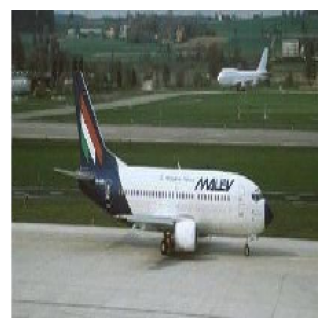

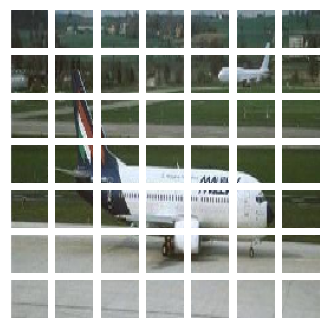

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.io
patch_size = 32
image_size = 224
# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(trainImages[0])  
plt.axis("off")  

# Extract patches from the image using the 'Patches' layer
patches = Patches(patch_size)(tf.convert_to_tensor([trainImages[0]]))

# Print information about the image and patch sizes
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"{patches.shape[1]} patches per image \n{patches.shape[-1]} elements per patch")

# Calculate the number of patches to be displayed in each row and column
n = int(np.sqrt(patches.shape[1]))

# Create a new figure for displaying the extracted patches
plt.figure(figsize=(4, 4))

# Iterate through and display each patch
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)  # Create a subplot
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))  # Reshape the patch to image dimensions
    plt.imshow(patch_img.numpy())  # Display the patch as an image
    plt.axis("off") 

In [9]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches

        self.projection = layers.Dense(units=projection_dim)

        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
    def get_config(self):
        config = super().get_config().copy()
        config.update(
            {
                "num_patches": num_patches,
                "projection_dim": projection_dim,
            }
        )
        return config

    def call(self, patch):
        # Create positions for the patches
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [10]:
def create_vit_object_detector(
    input_shape,
    patch_size,
    num_patches,
    projection_dim,
    num_heads,
    transformer_units,
    transformer_layers,
    mlp_head_units,
    num_classes
):
    inputs = layers.Input(shape=input_shape)
    

    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # Apply an MLP to the output
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        
        # Skip connection 2
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.3)(representation)
    
    # Add an additional MLP for feature extraction
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.3)

    # Bounding box output layer
    bounding_box = layers.Dense(4, name='bbox')(features)  # Assuming normalized coordinates for bounding boxes

    # Classification output layer
    classification = layers.Dense(num_classes, activation='softmax', name='classification')(features)

    # Return the Keras model with both outputs
    return keras.Model(inputs=inputs, outputs=[classification, bounding_box])

In [12]:
def run_experiment(model, learning_rate, weight_decay, batch_size, num_epochs, trainImages, trainBBoxes, trainLabels):
    optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)

    # Compile the model with multiple losses
    model.compile(
        optimizer=optimizer,
        loss={
            'bbox': keras.losses.MeanSquaredError(),
            'classification': keras.losses.CategoricalCrossentropy()
        },
        metrics={
            'bbox': [keras.metrics.MeanAbsoluteError()],
            'classification': [keras.metrics.CategoricalAccuracy()]
        }
    )

    checkpoint_filepath = "logs/"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

    # Assuming trainBBoxes and trainLabels are provided correctly formatted
    history = model.fit(
        x=trainImages,
        y={'bbox': trainBBoxes, 'classification': trainLabels},
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)],
    )

    return history

# Define input image shape and training hyperparameters
input_shape = (image_size, image_size, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 25
num_classes = trainLabels.shape[1]

# Calculate the number of patches
num_patches = (image_size // patch_size) ** 2

# Define the dimensions and layers for the Vision Transformer (ViT) model
projection_dim = 64
num_heads = 4
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 6
mlp_head_units = [2048, 1024, 512, 64, 32]

# Initialize a list to store training history
history = []

# Create a ViT-based object detection model
vit_object_detector = create_vit_object_detector(
    input_shape,
    patch_size,
    num_patches,
    projection_dim,
    num_heads,
    transformer_units,
    transformer_layers,
    mlp_head_units,
    num_classes
)

# Train the model and store the training history
history = run_experiment(
    vit_object_detector, learning_rate, weight_decay, batch_size, num_epochs, trainImages, trainBBoxes, trainLabels
)

Epoch 1/25
36/36 [==============================] - 50s 636ms/step - loss: 1.3308 - classification_loss: 0.8044 - bbox_loss: 0.5264 - classification_categorical_accuracy: 0.5043 - bbox_mean_absolute_error: 0.5590 - val_loss: 0.9060 - val_classification_loss: 0.6970 - val_bbox_loss: 0.2090 - val_classification_categorical_accuracy: 0.4844 - val_bbox_mean_absolute_error: 0.3852
Epoch 2/25
36/36 [==============================] - 22s 617ms/step - loss: 0.9416 - classification_loss: 0.7026 - bbox_loss: 0.2389 - classification_categorical_accuracy: 0.5304 - bbox_mean_absolute_error: 0.3931 - val_loss: 0.7165 - val_classification_loss: 0.6498 - val_bbox_loss: 0.0666 - val_classification_categorical_accuracy: 0.7500 - val_bbox_mean_absolute_error: 0.2140
Epoch 3/25
36/36 [==============================] - 24s 672ms/step - loss: 0.8421 - classification_loss: 0.6804 - bbox_loss: 0.1617 - classification_categorical_accuracy: 0.5670 - bbox_mean_absolute_error: 0.3128 - val_loss: 0.5424 - val_clas

Epoch 23/25
36/36 [==============================] - 21s 583ms/step - loss: 0.0885 - classification_loss: 0.0715 - bbox_loss: 0.0170 - classification_categorical_accuracy: 0.9870 - bbox_mean_absolute_error: 0.1000 - val_loss: 0.0932 - val_classification_loss: 0.0912 - val_bbox_loss: 0.0020 - val_classification_categorical_accuracy: 0.9688 - val_bbox_mean_absolute_error: 0.0288
Epoch 24/25
36/36 [==============================] - 21s 587ms/step - loss: 0.0917 - classification_loss: 0.0769 - bbox_loss: 0.0148 - classification_categorical_accuracy: 0.9817 - bbox_mean_absolute_error: 0.0930 - val_loss: 0.1036 - val_classification_loss: 0.1014 - val_bbox_loss: 0.0022 - val_classification_categorical_accuracy: 0.9688 - val_bbox_mean_absolute_error: 0.0318
Epoch 25/25
36/36 [==============================] - 21s 592ms/step - loss: 0.0645 - classification_loss: 0.0486 - bbox_loss: 0.0159 - classification_categorical_accuracy: 0.9922 - bbox_mean_absolute_error: 0.0940 - val_loss: 0.1460 - val_c

## Model Evaluation

### Accuracy, Loss plots

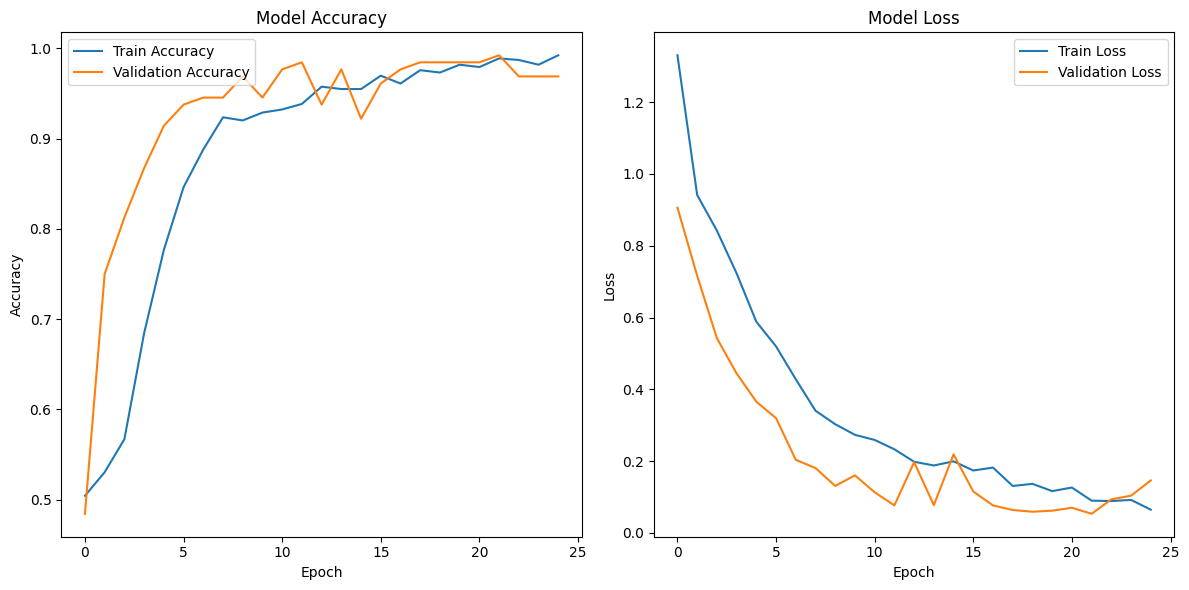

In [13]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_classification_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


### confusion matrix

10/10 [==============================] - 5s 154ms/step


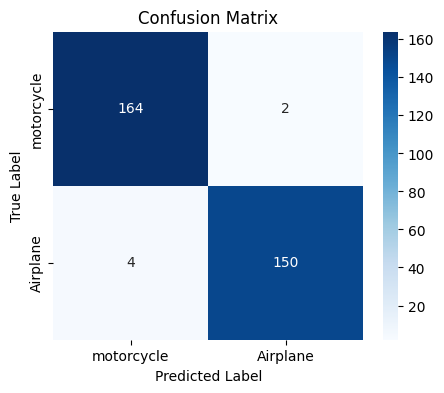

In [14]:
predictions = vit_object_detector.predict(testImages)

predicted_labels = np.argmax(predictions[0], axis=1)
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels_indices = np.argmax(testLabels, axis=1) 

cm = confusion_matrix(true_labels_indices, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['motorcycle','Airplane'], yticklabels=['motorcycle','Airplane'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [16]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

def compute_iou(boxA, boxB):
    assert len(boxA) == 4 and len(boxB) == 4, "Both boxes must have four coordinates"
    
    # Calculate coordinates for the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Calculate the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Calculate the area of both bounding boxes
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the intersection over union by dividing the intersection area by the sum of both areas minus their intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou


preds = vit_object_detector.predict(testImages, batch_size=32)

#predictions
predicted_bboxes = preds[1]
predicted_labels = np.argmax(preds[0], axis=1)
true_labels = np.argmax(testLabels, axis=1)

# Calculate IoUs and accuracies
ious = np.array([compute_iou(predicted_bboxes[i], testBBoxes[i]) for i in range(len(testBBoxes))])
label_accuracy = accuracy_score(true_labels, predicted_labels)

# Print the results
print(f"Mean IoU: {np.mean(ious)}")
print(f"Label Accuracy: {label_accuracy}")


10/10 [==============================] - 2s 192ms/step
Mean IoU: 0.9225451007496538
Label Accuracy: 0.98125


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import accuracy_score
import matplotlib.patches as patches

def calculate_mean_iou_and_label_accuracy_with_details(model, testImages, testBBoxes, testLabels):
    predictions = model.predict(testImages)
    predicted_bboxes = predictions[1]
    predicted_labels_indices = np.argmax(predictions[0], axis=1)
    true_labels_indices = np.argmax(testLabels, axis=1)

    # Calculate IoUs for each prediction
    ious = []
    for i in range(len(testBBoxes)):
        iou = compute_iou(predicted_bboxes[i], testBBoxes[i])
        ious.append(iou)
    
    mean_iou = np.mean(ious)
    label_accuracy = accuracy_score(true_labels_indices, predicted_labels_indices)
    
    return ious, mean_iou, label_accuracy


# Calculate IoUs, mean IoU, and label accuracy
ious, mean_iou, label_accuracy = calculate_mean_iou_and_label_accuracy_with_details(vit_object_detector, testImages, testBBoxes, testLabels)

# DataFrame to display IoUs in a table format
iou_df = pd.DataFrame({'Image Index': np.arange(1, len(ious) + 1), 'IoU': ious})
print(iou_df)

# Print the mean IoU and label accuracy
print(f"\nMean IoU: {mean_iou:.4f}")
print(f"Label Accuracy: {label_accuracy:.4f}")

10/10 [==============================] - 2s 166ms/step
     Image Index       IoU
0              1  0.932916
1              2  0.944933
2              3  0.914907
3              4  0.934762
4              5  0.934785
..           ...       ...
315          316  0.968816
316          317  0.940767
317          318  0.962947
318          319  0.934188
319          320  0.934390

[320 rows x 2 columns]

Mean IoU: 0.9225
Label Accuracy: 0.9812


### Bounding Boxes on Images

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_bounding_boxes_on_image(image, gt_box, pred_box, iou, gt_label, pred_label, line_thickness=2):
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)
    font_thickness = 1
    
    # ground truth box in green and label
    cv2.rectangle(image, (int(gt_box[0]), int(gt_box[1])), (int(gt_box[2]), int(gt_box[3])), (0, 255, 0), thickness=line_thickness)
    gt_label_text = f"GT: {'motorcycle' if gt_label == 1 else 'airplane'}"
    cv2.putText(image, gt_label_text, (int(gt_box[0]), int(gt_box[1]) - 10), font, font_scale, (0, 255, 0), font_thickness)
    
    # predicted box in red and label
    cv2.rectangle(image, (int(pred_box[0]), int(pred_box[1])), (int(pred_box[2]), int(pred_box[3])), (255, 0, 0), thickness=line_thickness)
    pred_label_text = f"Pred: {'motorcycle' if pred_label == 1 else 'airplane'}"
    cv2.putText(image, pred_label_text, (int(pred_box[0]), int(pred_box[1]) - 25), font, font_scale, (255, 0, 0), font_thickness)
    
     # Display IoU
    iou_text = f"IoU: {iou:.2f}"
    text_size = cv2.getTextSize(iou_text, font, font_scale, font_thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    cv2.putText(image, iou_text, (text_x, image.shape[0] - 10), font, font_scale, (0, 0, 0), font_thickness)
    
    
    return image

def visualize_with_details(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels):

    for i, (image, gt_box, pred_box, iou_score, gt_label, pred_label) in enumerate(zip(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels)):
        image_resized = cv2.resize(image, (224, 224))  # Resize image for consistency
        gt_box_resized = gt_box * np.array([224, 224, 224, 224])  # Adjusting GT box to image size
        pred_box_resized = pred_box * np.array([224, 224, 224, 224])  # Adjusting predicted box to image size

        image_with_boxes = draw_bounding_boxes_on_image(image_resized, gt_box_resized, pred_box_resized, iou_score, gt_label, pred_label)


        plt.figure(figsize=(4, 4))
        plt.imshow(image_with_boxes)
        plt.axis("off")
        plt.show()

visualize_with_details(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels)


### Images which are not predicted correctly (we can verify this result with confusion matrix results)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_bounding_boxes_on_image(image, gt_box, pred_box, iou, gt_label, pred_label, line_thickness=2):
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    cv2.rectangle(image, (int(gt_box[0]), int(gt_box[1])), (int(gt_box[2]), int(gt_box[3])), (0, 255, 0), thickness=line_thickness)
    gt_label_text = f"GT: {'motorcycle' if gt_label == 1 else 'airplane'}"
    cv2.putText(image, gt_label_text, (10, 30), font, font_scale, (0, 255, 0), font_thickness)
    cv2.rectangle(image, (int(pred_box[0]), int(pred_box[1])), (int(pred_box[2]), int(pred_box[3])), (255, 0, 0), thickness=line_thickness)
    pred_label_text = f"Pred: {'motorcycle' if pred_label == 1 else 'airplane'}"
    cv2.putText(image, pred_label_text, (image.shape[1] - 150, 30), font, font_scale, (255, 0, 0), font_thickness)
    
    iou_text = f"IoU: {iou:.2f}"
    text_size = cv2.getTextSize(iou_text, font, font_scale, font_thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    cv2.putText(image, iou_text, (text_x, image.shape[0] - 10), font, font_scale, (255, 255, 255), font_thickness)
    
    return image

def visualize_with_details(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels):

    for i, (image, gt_box, pred_box, iou_score, gt_label, pred_label) in enumerate(zip(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels)):
        if gt_label != pred_label:  # Check if the labels are not the same
            image_resized = cv2.resize(image, (224, 224)) 
            gt_box_resized = gt_box * np.array([224, 224, 224, 224])
            pred_box_resized = pred_box * np.array([224, 224, 224, 224])
            image_with_boxes = draw_bounding_boxes_on_image(image_resized, gt_box_resized, pred_box_resized, iou_score, gt_label, pred_label)

            plt.figure(figsize=(4, 4))
            plt.imshow(image_with_boxes)
            plt.axis("off")
            plt.show()


visualize_with_details(testImages, testBBoxes, predicted_bboxes, ious, true_labels, predicted_labels)


## VGG

In [23]:
BASE_OUTPUT = "output"
MODEL_PATH = os.path.join(BASE_OUTPUT, "detector.h5")
LB_PATH = os.path.join(BASE_OUTPUT, "lb.pickle")
PLOTS_PATH = os.path.join(BASE_OUTPUT, "plots")
TEST_PATHS = os.path.join(BASE_OUTPUT, "test_paths.txt")

INIT_LR = 1e-4
NUM_EPOCHS = 8
BATCH_SIZE = 32

In [24]:
print("[INFO] saving test image paths...")
with open(TEST_PATHS, "w") as f:
    f.write("\n".join(testPaths))

# Model creation starts here
vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
vgg.trainable = False

# Model architecture
flatten = Flatten()(vgg.output)

bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid", name="bounding_box")(bboxHead)

softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(len(lb.classes_), activation="softmax", name="class_label")(softmaxHead)

model = Model(inputs=vgg.input, outputs=(bboxHead, softmaxHead))

losses = {"class_label": "categorical_crossentropy", "bounding_box": "mean_squared_error"}
lossWeights = {"class_label": 1.0, "bounding_box": 1.0}

opt = Adam(learning_rate=INIT_LR)
model.compile(loss=losses, optimizer=opt, metrics=["accuracy"], loss_weights=lossWeights)

trainTargets = {"class_label": trainLabels, "bounding_box": trainBBoxes}
testTargets = {"class_label": testLabels, "bounding_box": testBBoxes}

print("[INFO] training model...")
H = model.fit(trainImages, trainTargets, validation_data=(testImages, testTargets), batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1)

print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")

print("[INFO] saving label binarizer...")
with open(LB_PATH, "wb") as f:
    f.write(pickle.dumps(lb))

[INFO] saving test image paths...

[INFO] training model...
Epoch 1/8

40/40 [==============================] - 998s 25s/step - loss: 0.1317 - bounding_box_loss: 0.0100 - class_label_loss: 0.1217 - bounding_box_accuracy: 0.7864 - class_label_accuracy: 0.9538 - val_loss: 0.0038 - val_bounding_box_loss: 0.0014 - val_class_label_loss: 0.0024 - val_bounding_box_accuracy: 0.7094 - val_class_label_accuracy: 1.0000
Epoch 2/8
40/40 [==============================] - 963s 24s/step - loss: 0.0086 - bounding_box_loss: 0.0012 - class_label_loss: 0.0074 - bounding_box_accuracy: 0.8529 - class_label_accuracy: 0.9984 - val_loss: 0.0013 - val_bounding_box_loss: 9.0832e-04 - val_class_label_loss: 4.4092e-04 - val_bounding_box_accuracy: 0.8813 - val_class_label_accuracy: 1.0000
Epoch 3/8
40/40 [==============================] - 975s 24s/step - loss: 0.0037 - bounding_box_loss: 8.8215e-04 - class_label_loss: 0.0028 - bounding_box_accuracy: 0.8858 - class_label_accuracy: 1.0000 - val_loss: 0.0013 - val_bo

In [25]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Function to calculate IoU
def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute the intersection over union
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

# Load the model and label binarizer
print("[INFO] loading object detector model and label binarizer...")
model = load_model(MODEL_PATH)
with open(LB_PATH, "rb") as f:
    lb = pickle.load(f)

# Make predictions on the test images
print("[INFO] predicting on test dataset...")
preds = model.predict(testImages, batch_size=BATCH_SIZE)

# Separate the predictions
predicted_bboxes = preds[0]
predicted_labels = np.argmax(preds[1], axis=1)
true_labels = np.argmax(testLabels, axis=1)

# Calculate IoUs and accuracies
ious = np.array([compute_iou(predicted_bboxes[i], testBBoxes[i]) for i in range(len(testBBoxes))])
label_accuracy = accuracy_score(true_labels, predicted_labels)

# Print the results
print(f"Mean IoU: {np.mean(ious)}")
print(f"Label Accuracy: {label_accuracy}")


[INFO] loading object detector model and label binarizer...
[INFO] predicting on test dataset...
10/10 [==============================] - 141s 15s/step
Mean IoU: 0.9035067946096607
Label Accuracy: 1.0
